In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df = pd.read_csv('RPGF3Results.csv')

In [40]:
selected_columns = ['Meta: Project Name', 'Category: Developer Ecosystem', 'OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars', 'OSO: Contributors Last 6 Months', 'OSO: Avg Monthly Active Devs Last 6 Months']

df[selected_columns] = df[selected_columns].fillna(0)

selected_rows = df.loc[df['Category: Developer Ecosystem'] == 1, selected_columns]

columns_to_rank = ['OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars', 'OSO: Contributors Last 6 Months', 'OSO: Avg Monthly Active Devs Last 6 Months']

for col in columns_to_rank:
    non_zero_indices = selected_rows[col] != 0  # ไม่เอาช่องที่เป็น 0 มาคิด
    selected_rows.loc[non_zero_indices, col] = selected_rows.loc[non_zero_indices, col].rank(pct=True)

selected_rows['Allocation'] = selected_rows[columns_to_rank].sum(axis=1)

total_allocation = 30000000

allocation_ratio = total_allocation / selected_rows['Allocation'].sum()

selected_rows['Total Allocation'] = (selected_rows['Allocation'] * allocation_ratio).round(2).astype(float)
# pd.set_option('display.max_rows', None)
selected_rows

,Meta: Project Name,Category: Developer Ecosystem,OSO: Total Contributors,OSO: Total Forks,OSO: Total Stars,OSO: Contributors Last 6 Months,OSO: Avg Monthly Active Devs Last 6 Months,Allocation,Total Allocation
0,Protocol Guild,1,1.000000,0.995238,0.995614,1.000000,1.000000,4.990852,386388.55
1,go-ethereum,1,0.994872,0.995238,0.995614,0.979167,0.594512,4.559403,352986.02
2,Solidity,1,0.964103,0.971429,0.964912,0.927083,0.774390,4.601917,356277.44
3,Erigon,1,0.933333,0.828571,0.850877,0.958333,0.871951,4.443067,343979.34
4,ethers.js,1,0.953846,0.904762,0.929825,0.947917,0.518293,4.254642,329391.64
...,...,...,...,...,...,...,...,...,...
615,Optimism AI,1,0.028205,0.000000,0.000000,0.046875,0.082317,0.157397,12185.59
634,Blocktorch,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
637,UTU,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
639,c2ba,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [49]:
allocation_sum = selected_rows['Allocation'].sum()
print("Allocation:", allocation_sum)

Allocation: 387.5


In [47]:
total_allocation_sum = selected_rows['Total Allocation'].sum()
print("Total Allocation:", total_allocation_sum)

Total Allocation: 30000000.010000005


C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\1954756874.py:7: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\1954756874.py:7: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\1954756874.py:7: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\

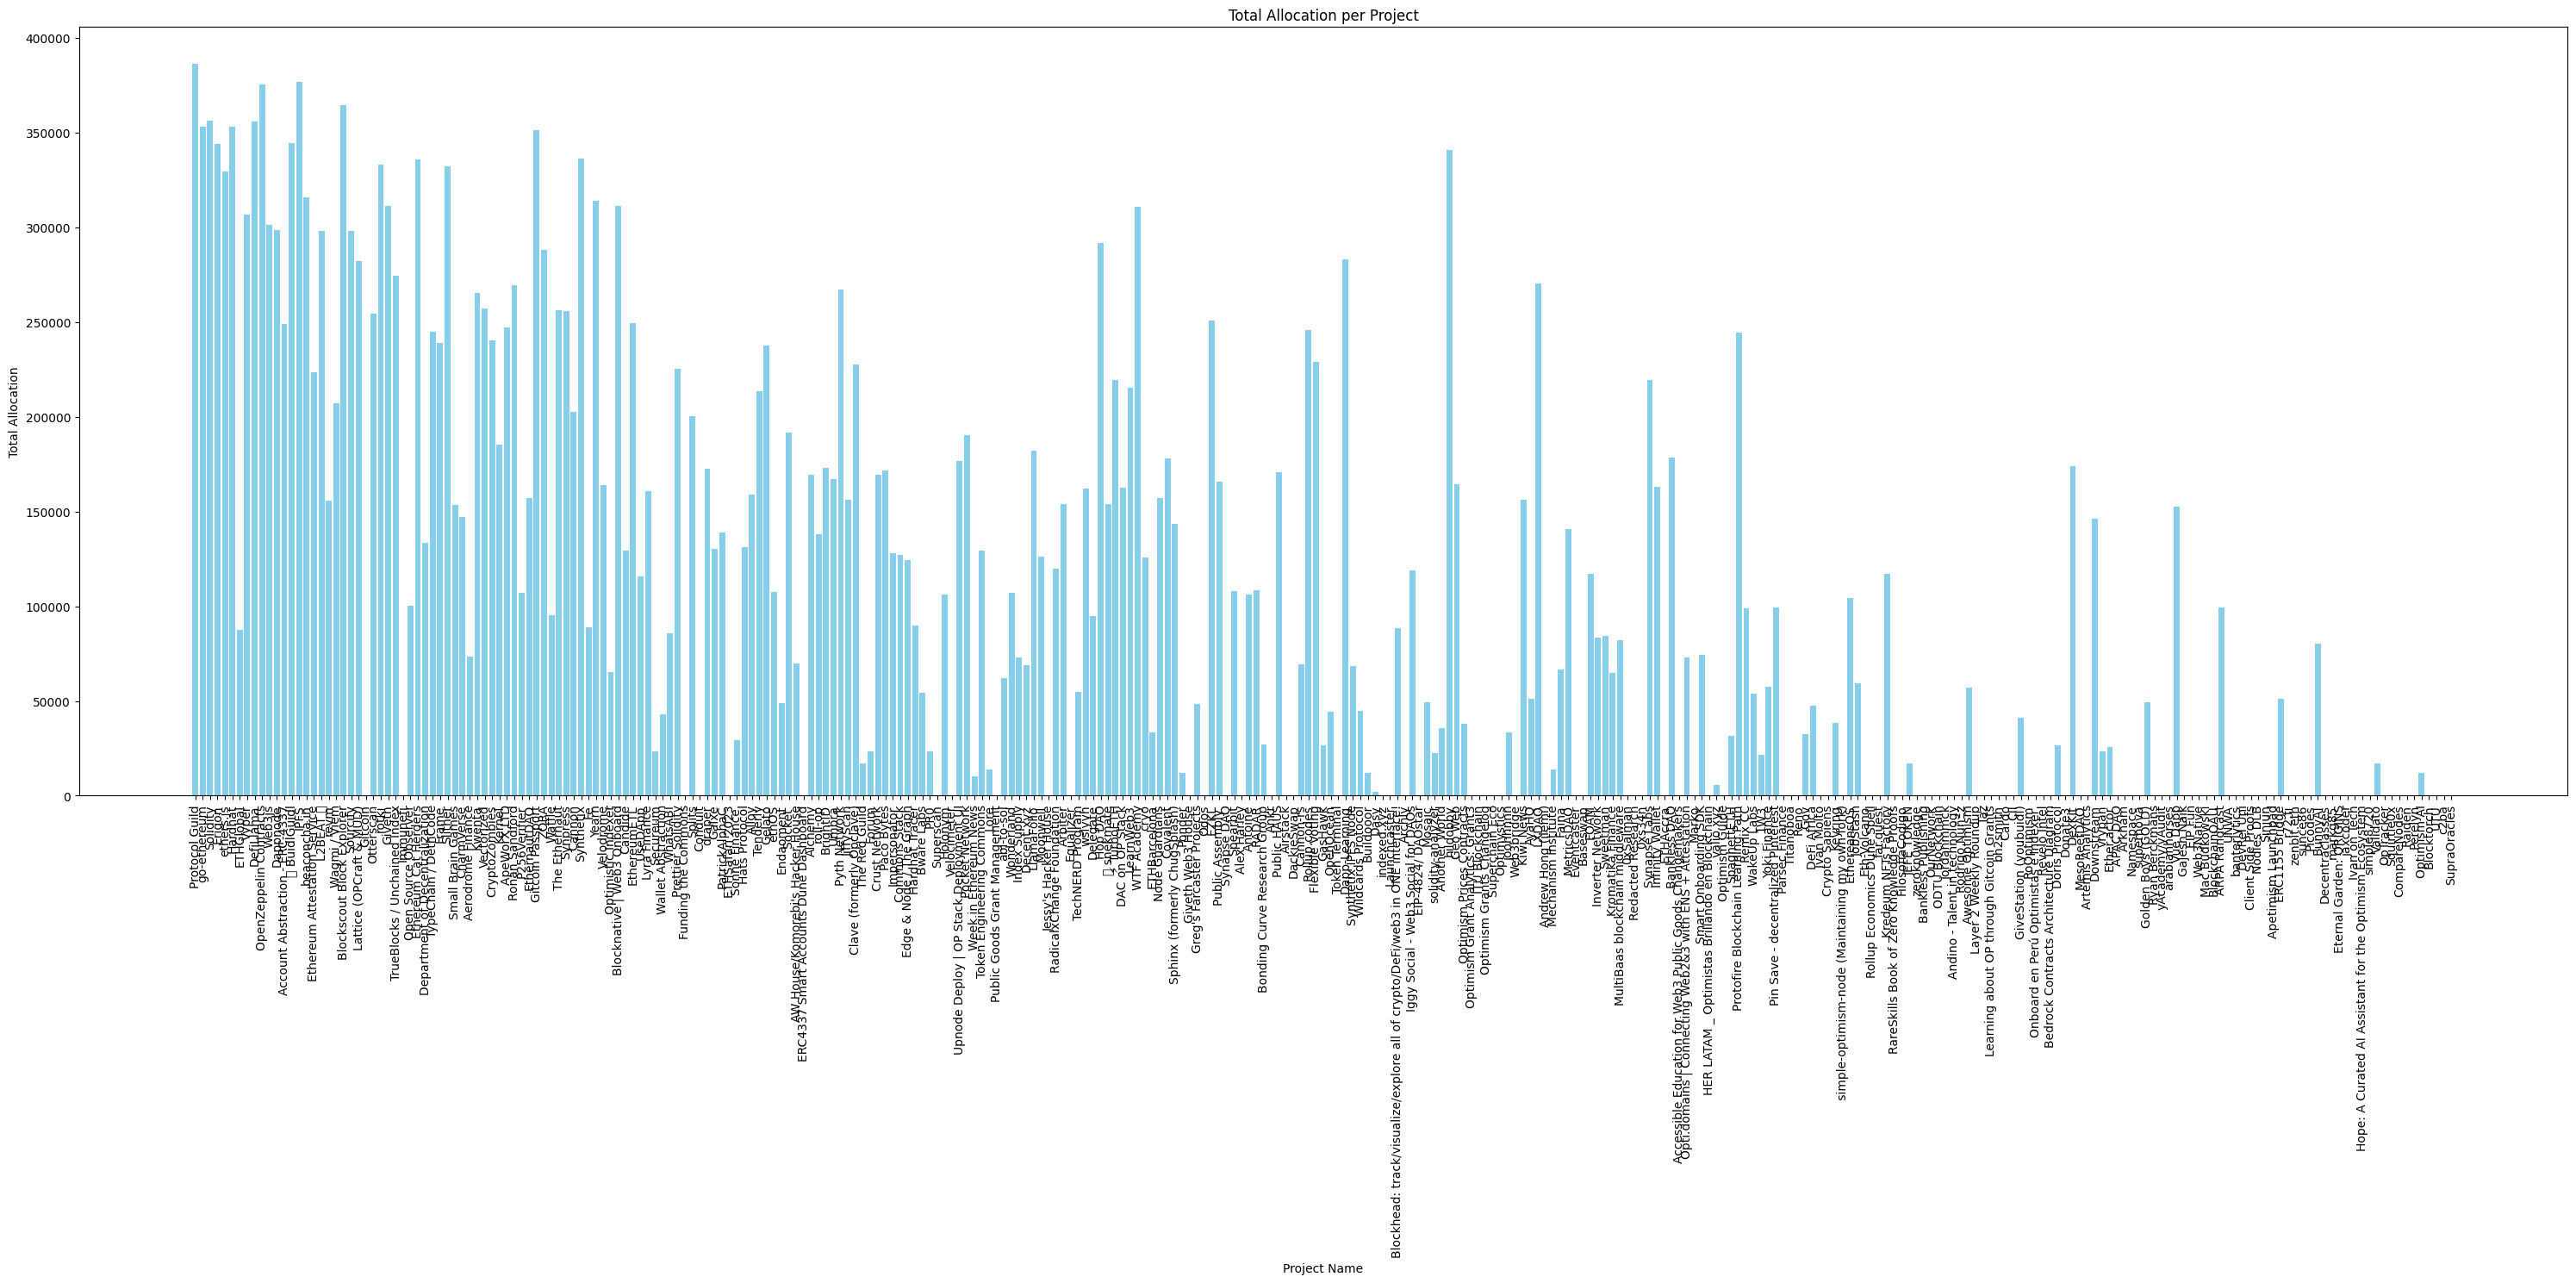

In [43]:
plt.figure(figsize=(30, 15))
plt.bar(selected_rows['Meta: Project Name'], selected_rows['Total Allocation'], color='skyblue')
plt.xlabel('Project Name')
plt.ylabel('Total Allocation')
plt.title('Total Allocation per Project')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\2561821270.py:9: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\2561821270.py:9: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\2561821270.py:9: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\

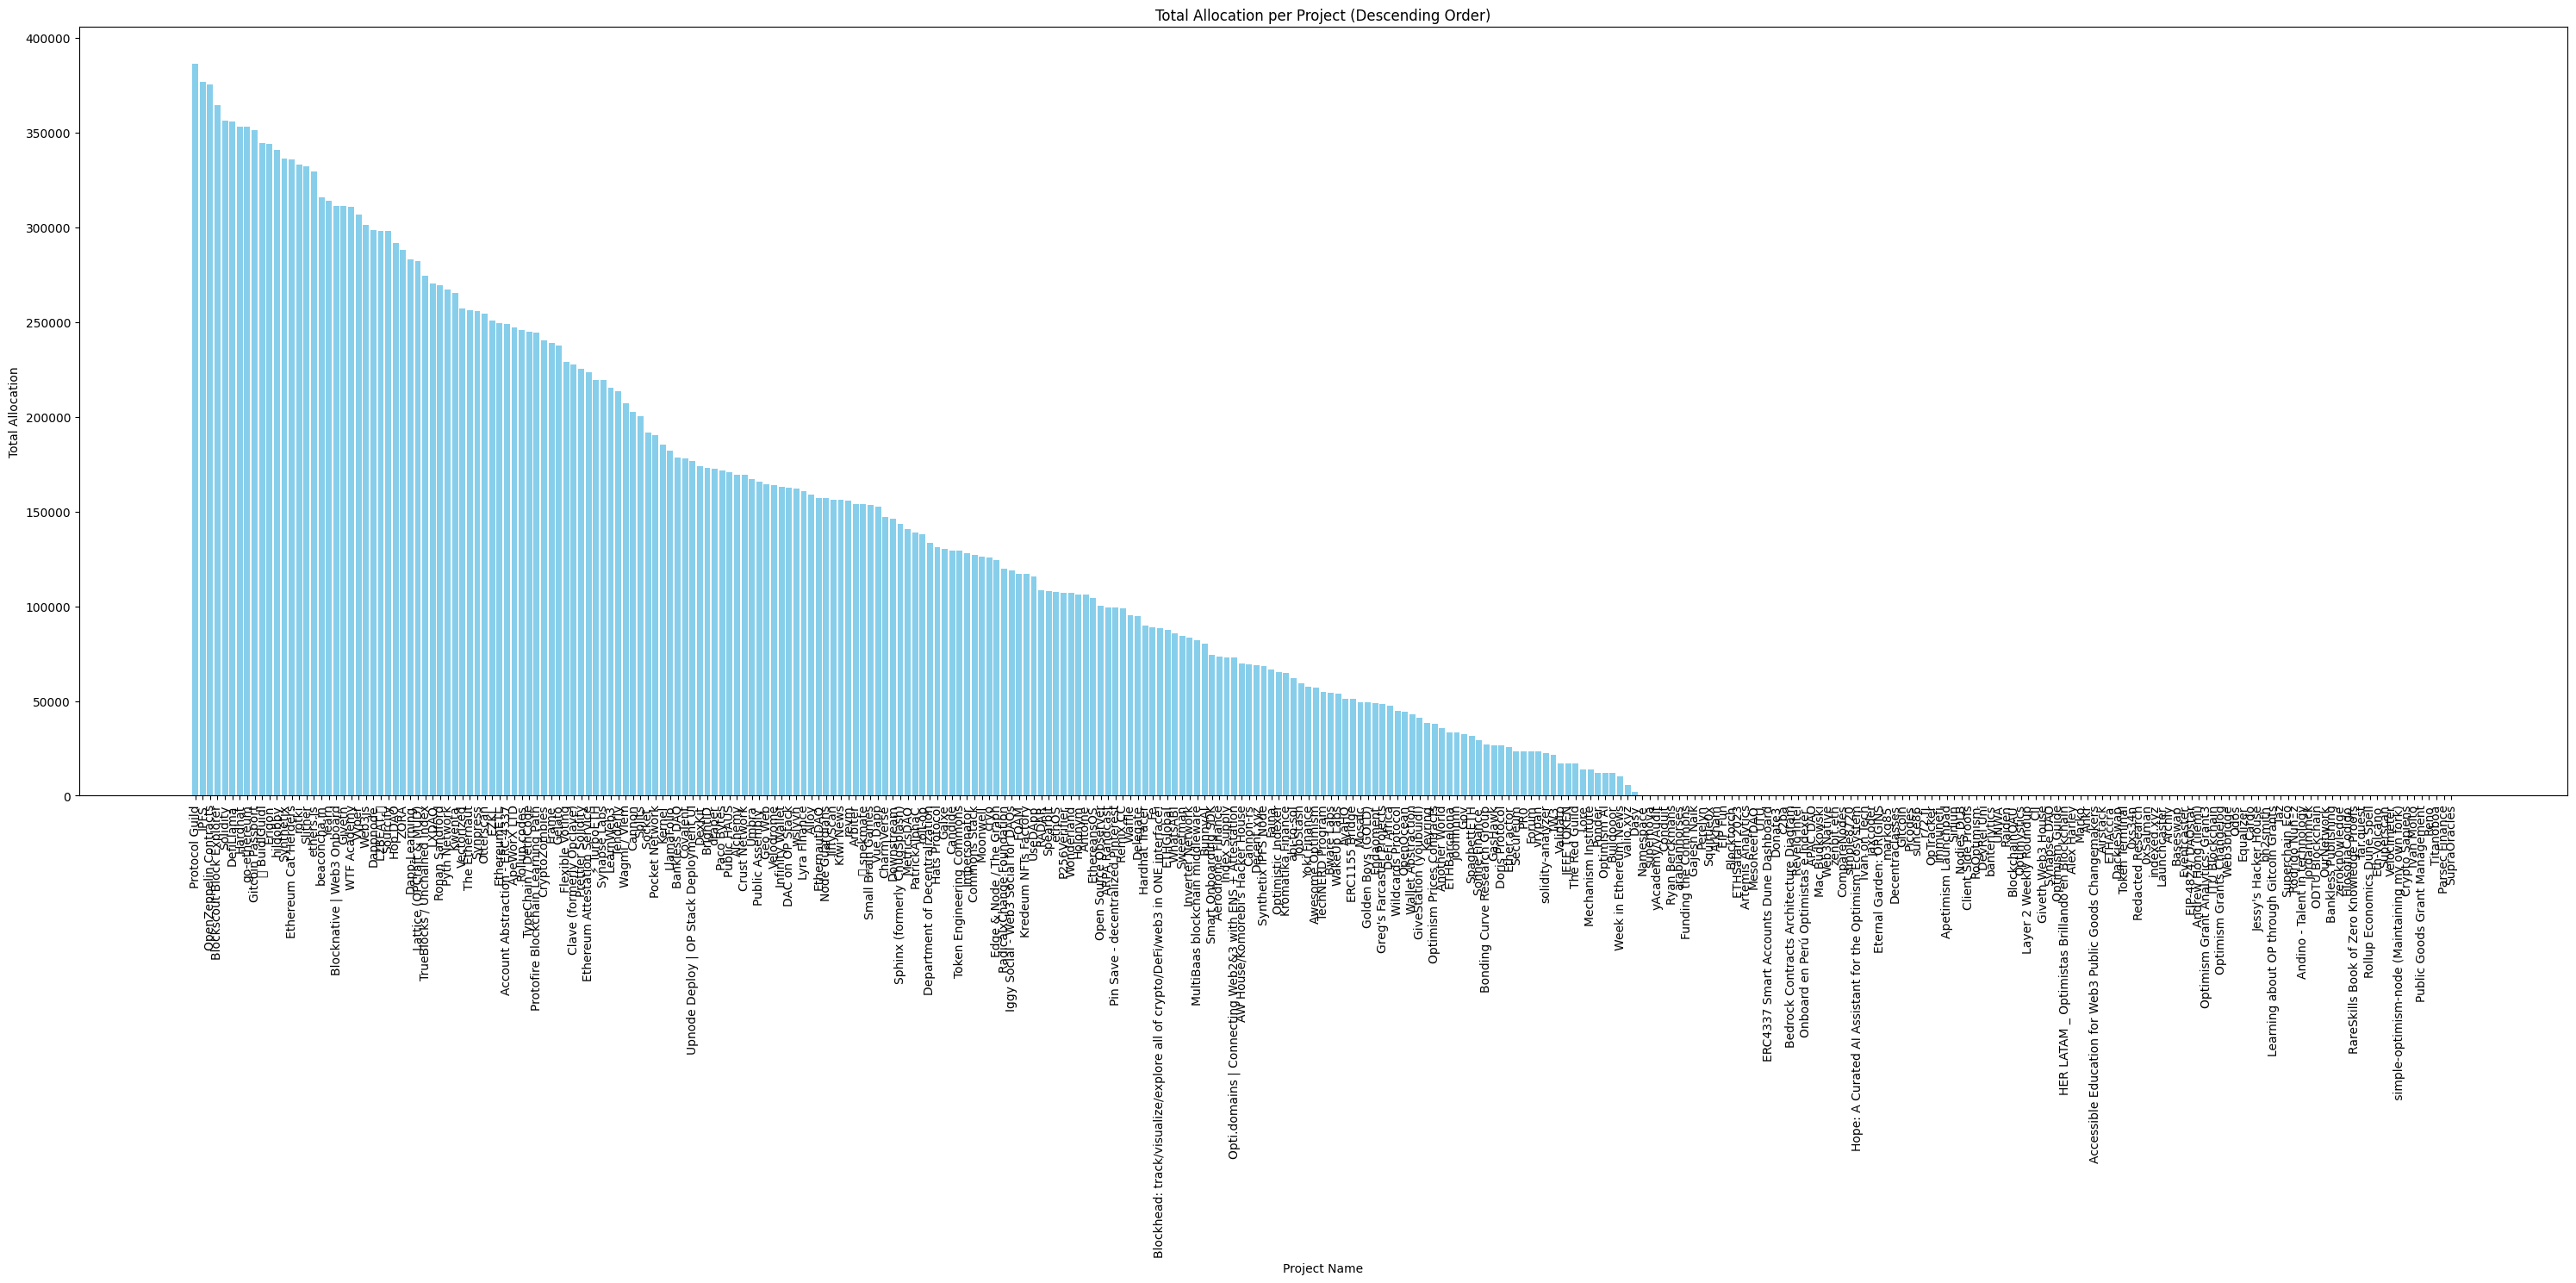

In [44]:
sorted_rows = selected_rows.sort_values(by='Total Allocation', ascending=False)

plt.figure(figsize=(30, 15))
plt.bar(sorted_rows['Meta: Project Name'], sorted_rows['Total Allocation'], color='skyblue')
plt.xlabel('Project Name')
plt.ylabel('Total Allocation')
plt.title('Total Allocation per Project (Descending Order)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\627374271.py:11: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\627374271.py:11: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\627374271.py:11: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\

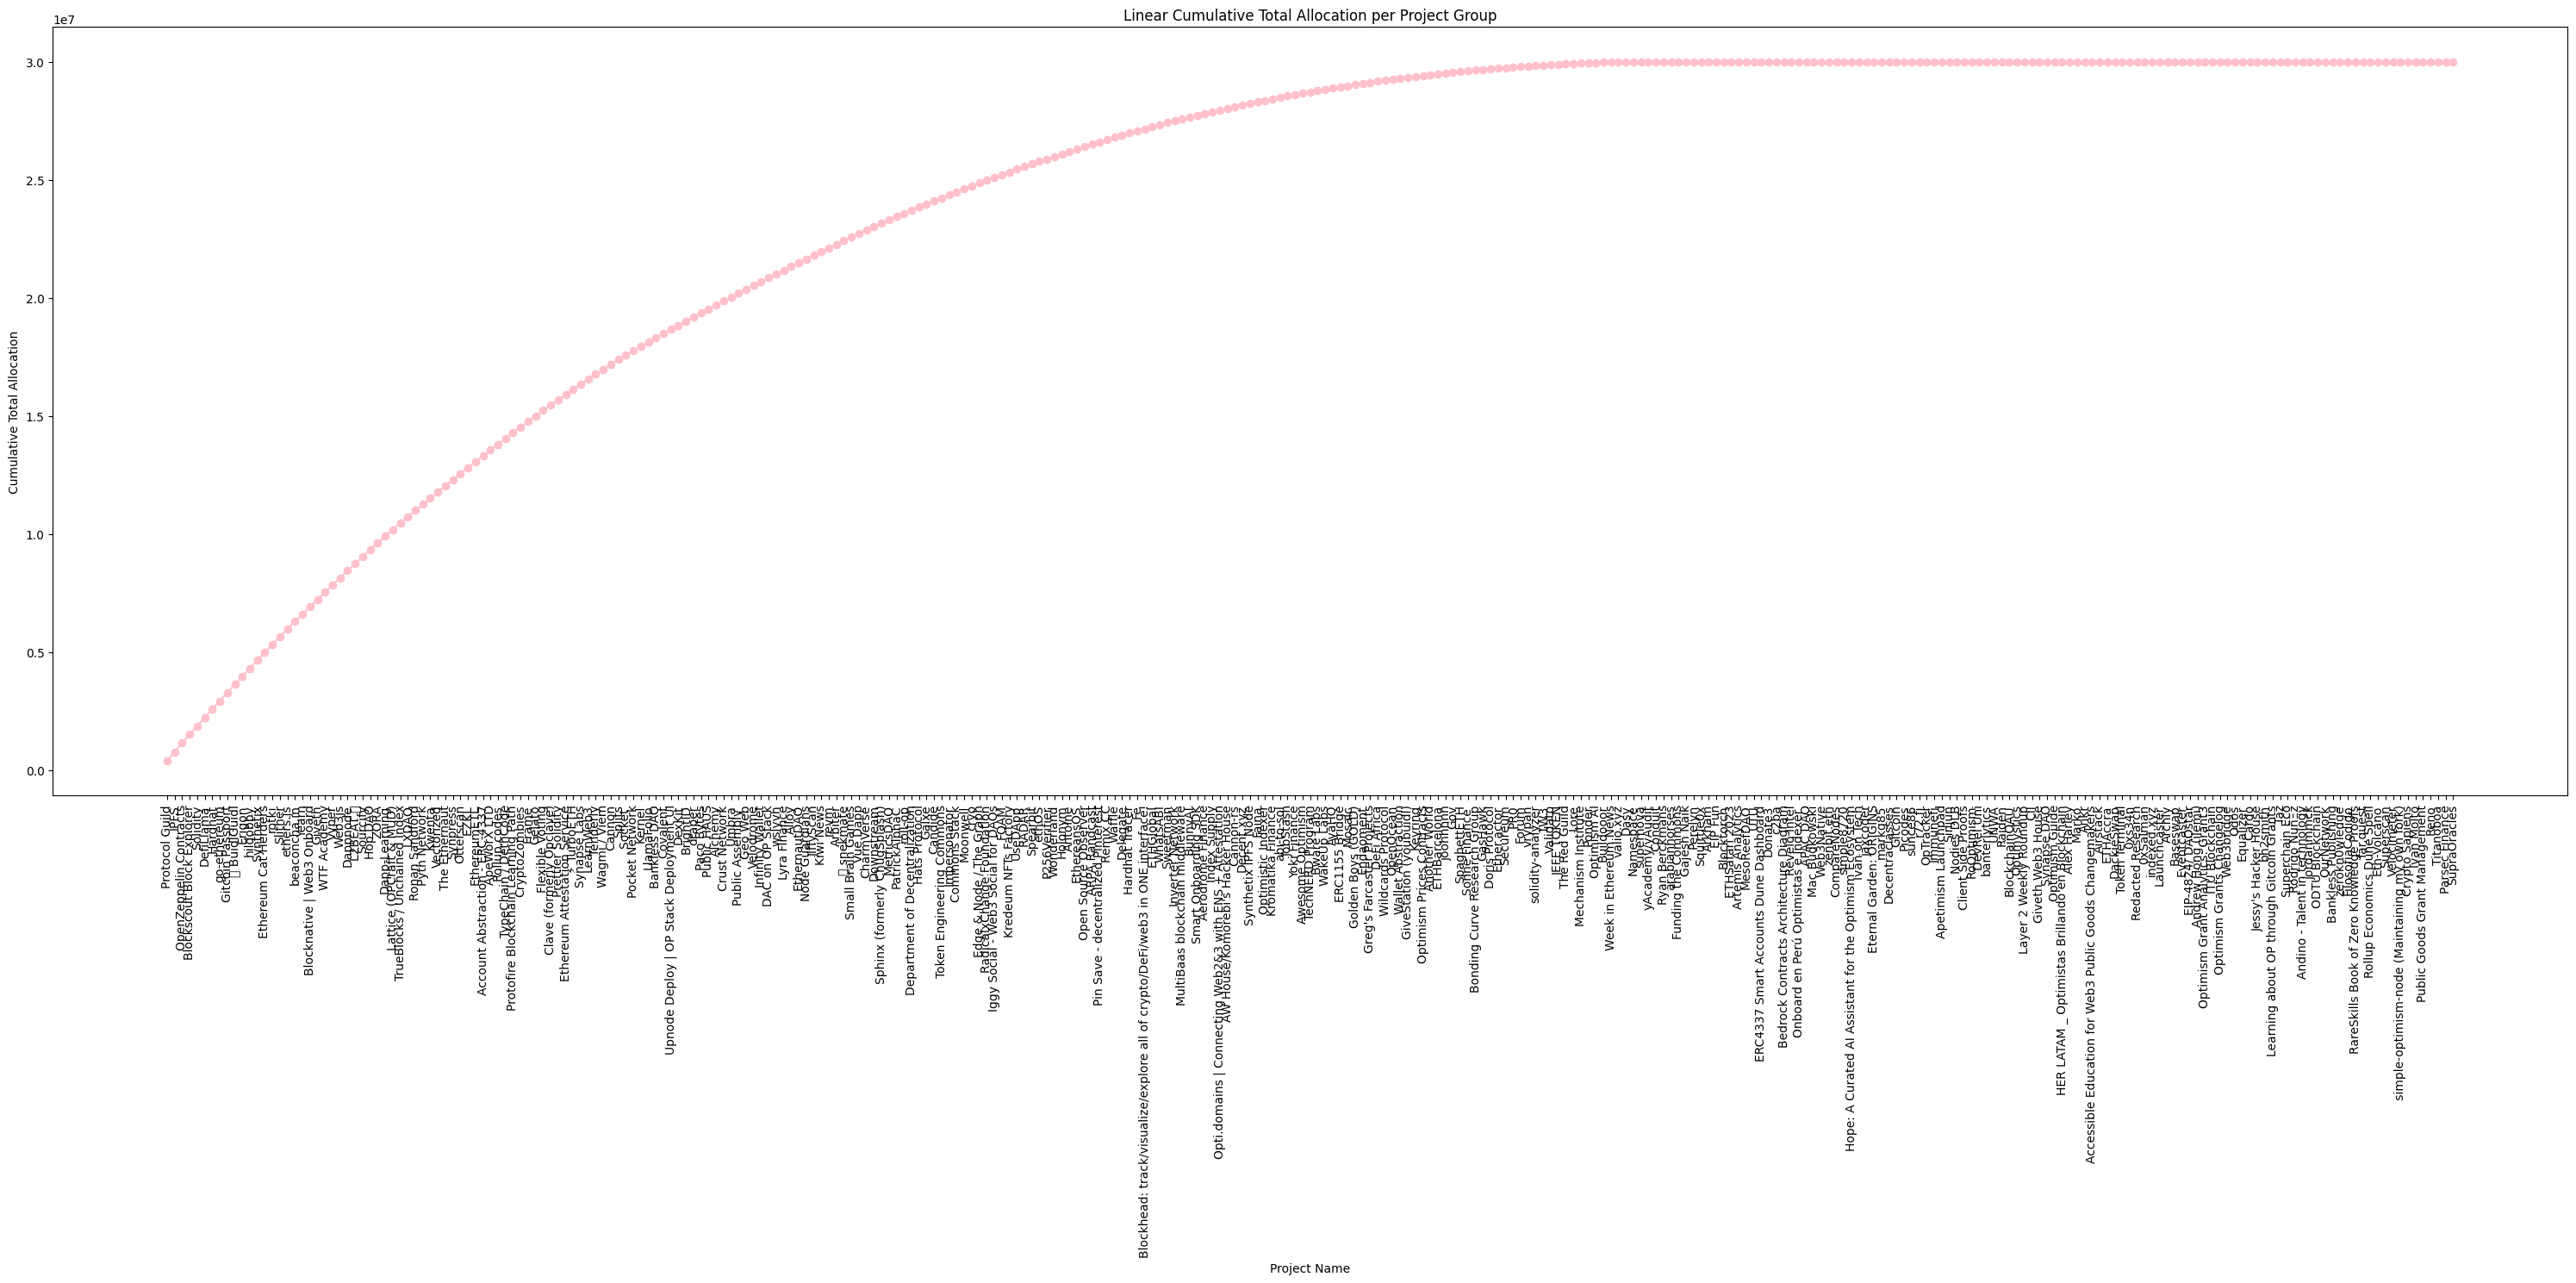

In [45]:
cumulative_df = sorted_rows[['Meta: Project Name', 'Total Allocation']].copy()

cumulative_df['Cumulative Total Allocation'] = cumulative_df['Total Allocation'].cumsum()

plt.figure(figsize=(30, 15))
plt.plot(cumulative_df['Meta: Project Name'], cumulative_df['Cumulative Total Allocation'], marker='o', linestyle='-', color = 'pink')
plt.xlabel('Project Name')
plt.ylabel('Cumulative Total Allocation')
plt.title('Linear Cumulative Total Allocation per Project Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\3182229776.py:14: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\3182229776.py:14: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_15460\3182229776.py:14: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  fig.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPyth

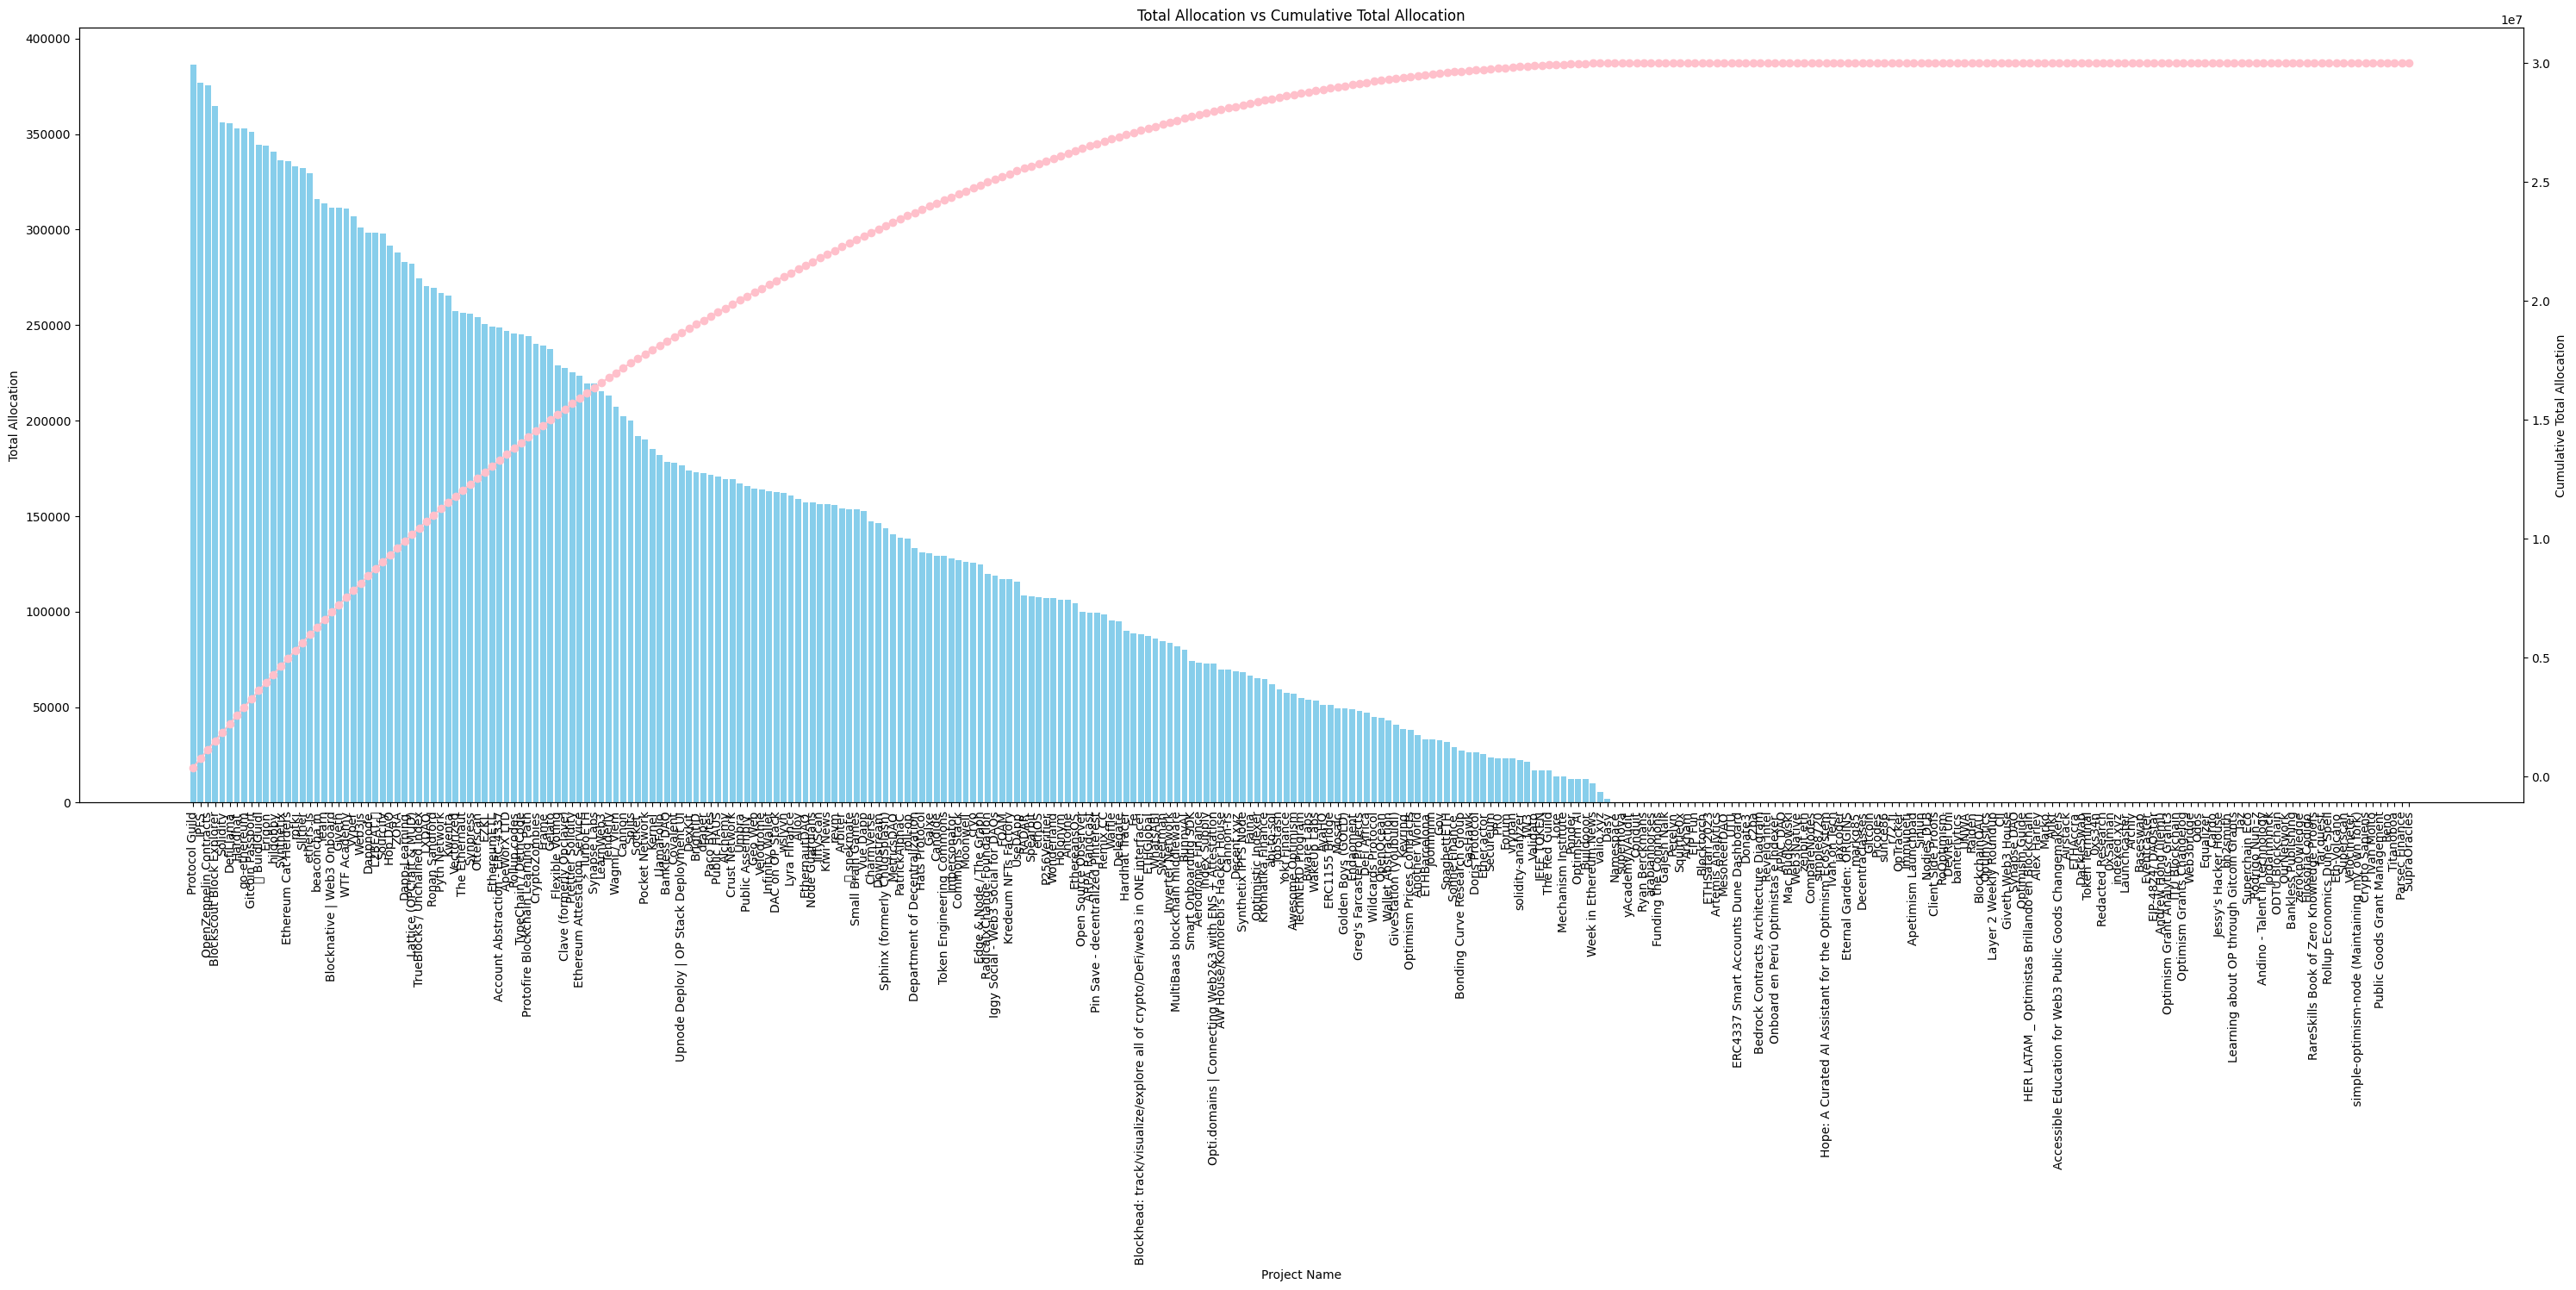

In [46]:
fig, ax1 = plt.subplots(figsize=(30, 15))

ax1.bar(sorted_rows['Meta: Project Name'], sorted_rows['Total Allocation'], color='skyblue')
ax1.set_xlabel('Project Name')
ax1.set_ylabel('Total Allocation')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
cumulative_df = sorted_rows[['Meta: Project Name', 'Total Allocation']].copy()
cumulative_df['Cumulative Total Allocation'] = cumulative_df['Total Allocation'].cumsum()
ax2.plot(cumulative_df['Meta: Project Name'], cumulative_df['Cumulative Total Allocation'], marker='o', linestyle='-', color='pink')
ax2.set_ylabel('Cumulative Total Allocation')

fig.tight_layout()
plt.title('Total Allocation vs Cumulative Total Allocation')
plt.show()